In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:

class NeuralNetwork:
    def __init__(self, input_neurons=2, hidden_neurons1=10, hidden_neurons2=8, output_neurons=4, lr=0.001):
        self.input_neurons = input_neurons
        self.hidden_neurons1 = hidden_neurons1
        self.hidden_neurons2 = hidden_neurons2
        self.output_neurons = output_neurons
        self.lr = lr

        self.W_HI = np.random.randn(self.input_neurons, self.hidden_neurons1)
        self.W_H2 = np.random.randn(self.hidden_neurons1, self.hidden_neurons2)
        self.W_OH = np.random.randn(self.hidden_neurons2, self.output_neurons)

        self.bias1 = np.random.rand(self.hidden_neurons1)
        self.bias2 = np.random.rand(self.hidden_neurons2)
        self.bias3 = np.random.rand(self.output_neurons)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        x = x - np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.Z1 = X.dot(self.W_HI) + self.bias1
        self.A1 = self.relu(self.Z1)

        self.Z2 = self.A1.dot(self.W_H2) + self.bias2
        self.A2 = self.relu(self.Z2)

        self.Z3 = self.A2.dot(self.W_OH) + self.bias3
        self.A3 = self.softmax(self.Z3)
        return self.A3

    def backPropagation(self, X, Y, output):
        m = X.shape[0]

        output_error = output - Y
        output_delta = self.lr * (self.A2.T.dot(output_error) / m)
        bias3_delta = self.lr * np.mean(output_error, axis=0)

        hidden_error2 = output_error.dot(self.W_OH.T) * self.relu_derivative(self.Z2)
        hidden_delta2 = self.lr * (self.A1.T.dot(hidden_error2) / m)
        bias2_delta = self.lr * np.mean(hidden_error2, axis=0)

        hidden_error1 = hidden_error2.dot(self.W_H2.T) * self.relu_derivative(self.Z1)
        hidden_delta1 = self.lr * (X.T.dot(hidden_error1) / m)
        bias1_delta = self.lr * np.mean(hidden_error1, axis=0)

        self.W_OH -= output_delta
        self.W_H2 -= hidden_delta2
        self.W_HI -= hidden_delta1

        self.bias3 -= bias3_delta
        self.bias2 -= bias2_delta
        self.bias1 -= bias1_delta

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
        return output


In [5]:
def accuracy(Y_true, Y_pred):
    pred_classes = np.argmax(Y_pred, axis=1)
    true_classes = np.argmax(Y_true, axis=1)
    return np.mean(pred_classes == true_classes)

In [6]:
np.random.seed(42)
X, y = make_blobs(n_samples=80, centers=4, n_features=2, random_state=42)
Y_one_hot = np.zeros((y.size, 4))
Y_one_hot[np.arange(y.size), y] = 1

Y = np.zeros((y.size, 4))
Y[np.arange(y.size), y] = 1

def minmax_scale(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

X = minmax_scale(X)

Epoch 0, Loss: 0.364597
Epoch 100, Loss: 0.284399
Epoch 200, Loss: 0.254113
Epoch 300, Loss: 0.240390
Epoch 400, Loss: 0.229193
Epoch 500, Loss: 0.219012
Epoch 600, Loss: 0.208932
Epoch 700, Loss: 0.198725
Epoch 800, Loss: 0.188458
Epoch 900, Loss: 0.178908
Epoch 1000, Loss: 0.170024
Epoch 1100, Loss: 0.161855
Epoch 1200, Loss: 0.154601
Epoch 1300, Loss: 0.148247
Epoch 1400, Loss: 0.142798
Epoch 1500, Loss: 0.138129
Epoch 1600, Loss: 0.133954
Epoch 1700, Loss: 0.130156
Epoch 1800, Loss: 0.126641
Epoch 1900, Loss: 0.123420
Epoch 2000, Loss: 0.120423
Epoch 2100, Loss: 0.117607
Epoch 2200, Loss: 0.115013
Epoch 2300, Loss: 0.112556
Epoch 2400, Loss: 0.110174
Epoch 2500, Loss: 0.107892
Epoch 2600, Loss: 0.105674
Epoch 2700, Loss: 0.103398
Epoch 2800, Loss: 0.101197
Epoch 2900, Loss: 0.099042
Epoch 3000, Loss: 0.096938
Epoch 3100, Loss: 0.094926
Epoch 3200, Loss: 0.092949
Epoch 3300, Loss: 0.090996
Epoch 3400, Loss: 0.089064
Epoch 3500, Loss: 0.087138
Epoch 3600, Loss: 0.085240
Epoch 3700, L

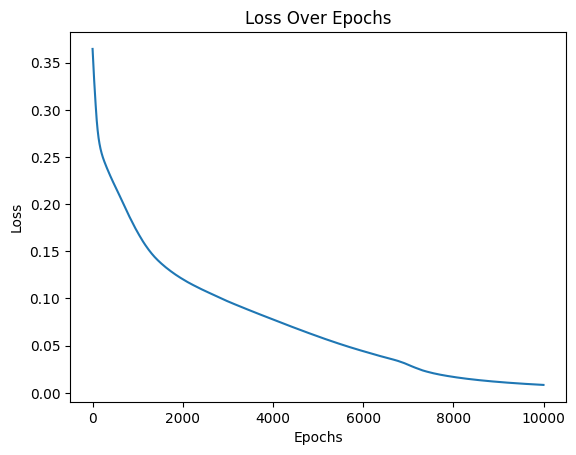

In [7]:
NN = NeuralNetwork()
losses = []
acc = []

for epoch in range(10000):
    pred = NN.feedForward(X)
    loss = np.mean(np.square(Y_one_hot - pred))
    losses.append(loss)
    acc.append(accuracy(Y_one_hot, pred))
    NN.train(X, Y_one_hot)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

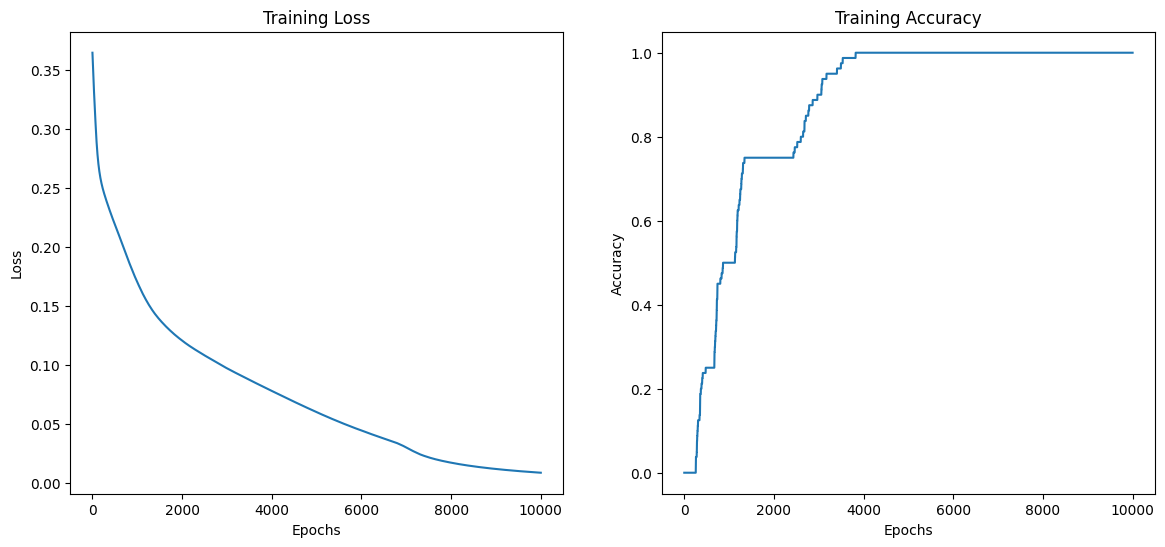

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(acc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')

plt.show()